# <center>Data Mining Project</center>

<center>
Master in Data Science and Advanced Analytics <br>
NOVA Information Management School
</center>

** **
## <center>*ABCDEats Inc*</center>

<center>
Group 19 <br>
Jan-Louis Schneider, 20240506  <br>
Marta Boavida, 20240519  <br>
Matilde Miguel, 20240549  <br>
Sofia Gomes, 20240848  <br>
</center>

** **

## <span style="color:salmon"> Notebook </span> 

In this notebook, we create some new features and process this new features.

## <span style="color:salmon"> Table of Contents </span>

<a class="anchor" id="top"></a>

1. [Import Libraries](#one-bullet) <br>

2. [Import Datasets](#two-bullet) <br>

3. [Create new features](#three-bullet) <br>

4. [Preprocessing new features](#four-bullet) <br>

5. [Export Datasets](#seven-bullet) <br> 


<a class="anchor" id="one-bullet"></a>
## <span style="color:salmon"> 1. Import Libraries </span> 

In [1]:
!jupyter nbconvert --to script "Processing_Data.ipynb"

[NbConvertApp] Converting notebook Processing_Data.ipynb to script
[NbConvertApp] Writing 25321 bytes to Processing_Data.py


Percentage of missing values:
last_promo                  52.530196
HR_0                         3.651765
customer_age                 2.280784
customer_region              1.386667
first_order                  0.332549
product_count                0.056471
is_chain                     0.000000
last_order                   0.000000
payment_method               0.000000
CUI_American                 0.000000
CUI_Asian                    0.000000
CUI_Beverages                0.000000
CUI_Cafe                     0.000000
CUI_Chicken Dishes           0.000000
CUI_Chinese                  0.000000
CUI_Desserts                 0.000000
CUI_Healthy                  0.000000
CUI_Indian                   0.000000
CUI_Italian                  0.000000
CUI_Japanese                 0.000000
CUI_Noodle Dishes            0.000000
CUI_OTHER                    0.000000
vendor_count                 0.000000
CUI_Street Food / Snacks     0.000000
CUI_Thai                     0.000000
DOW_1               

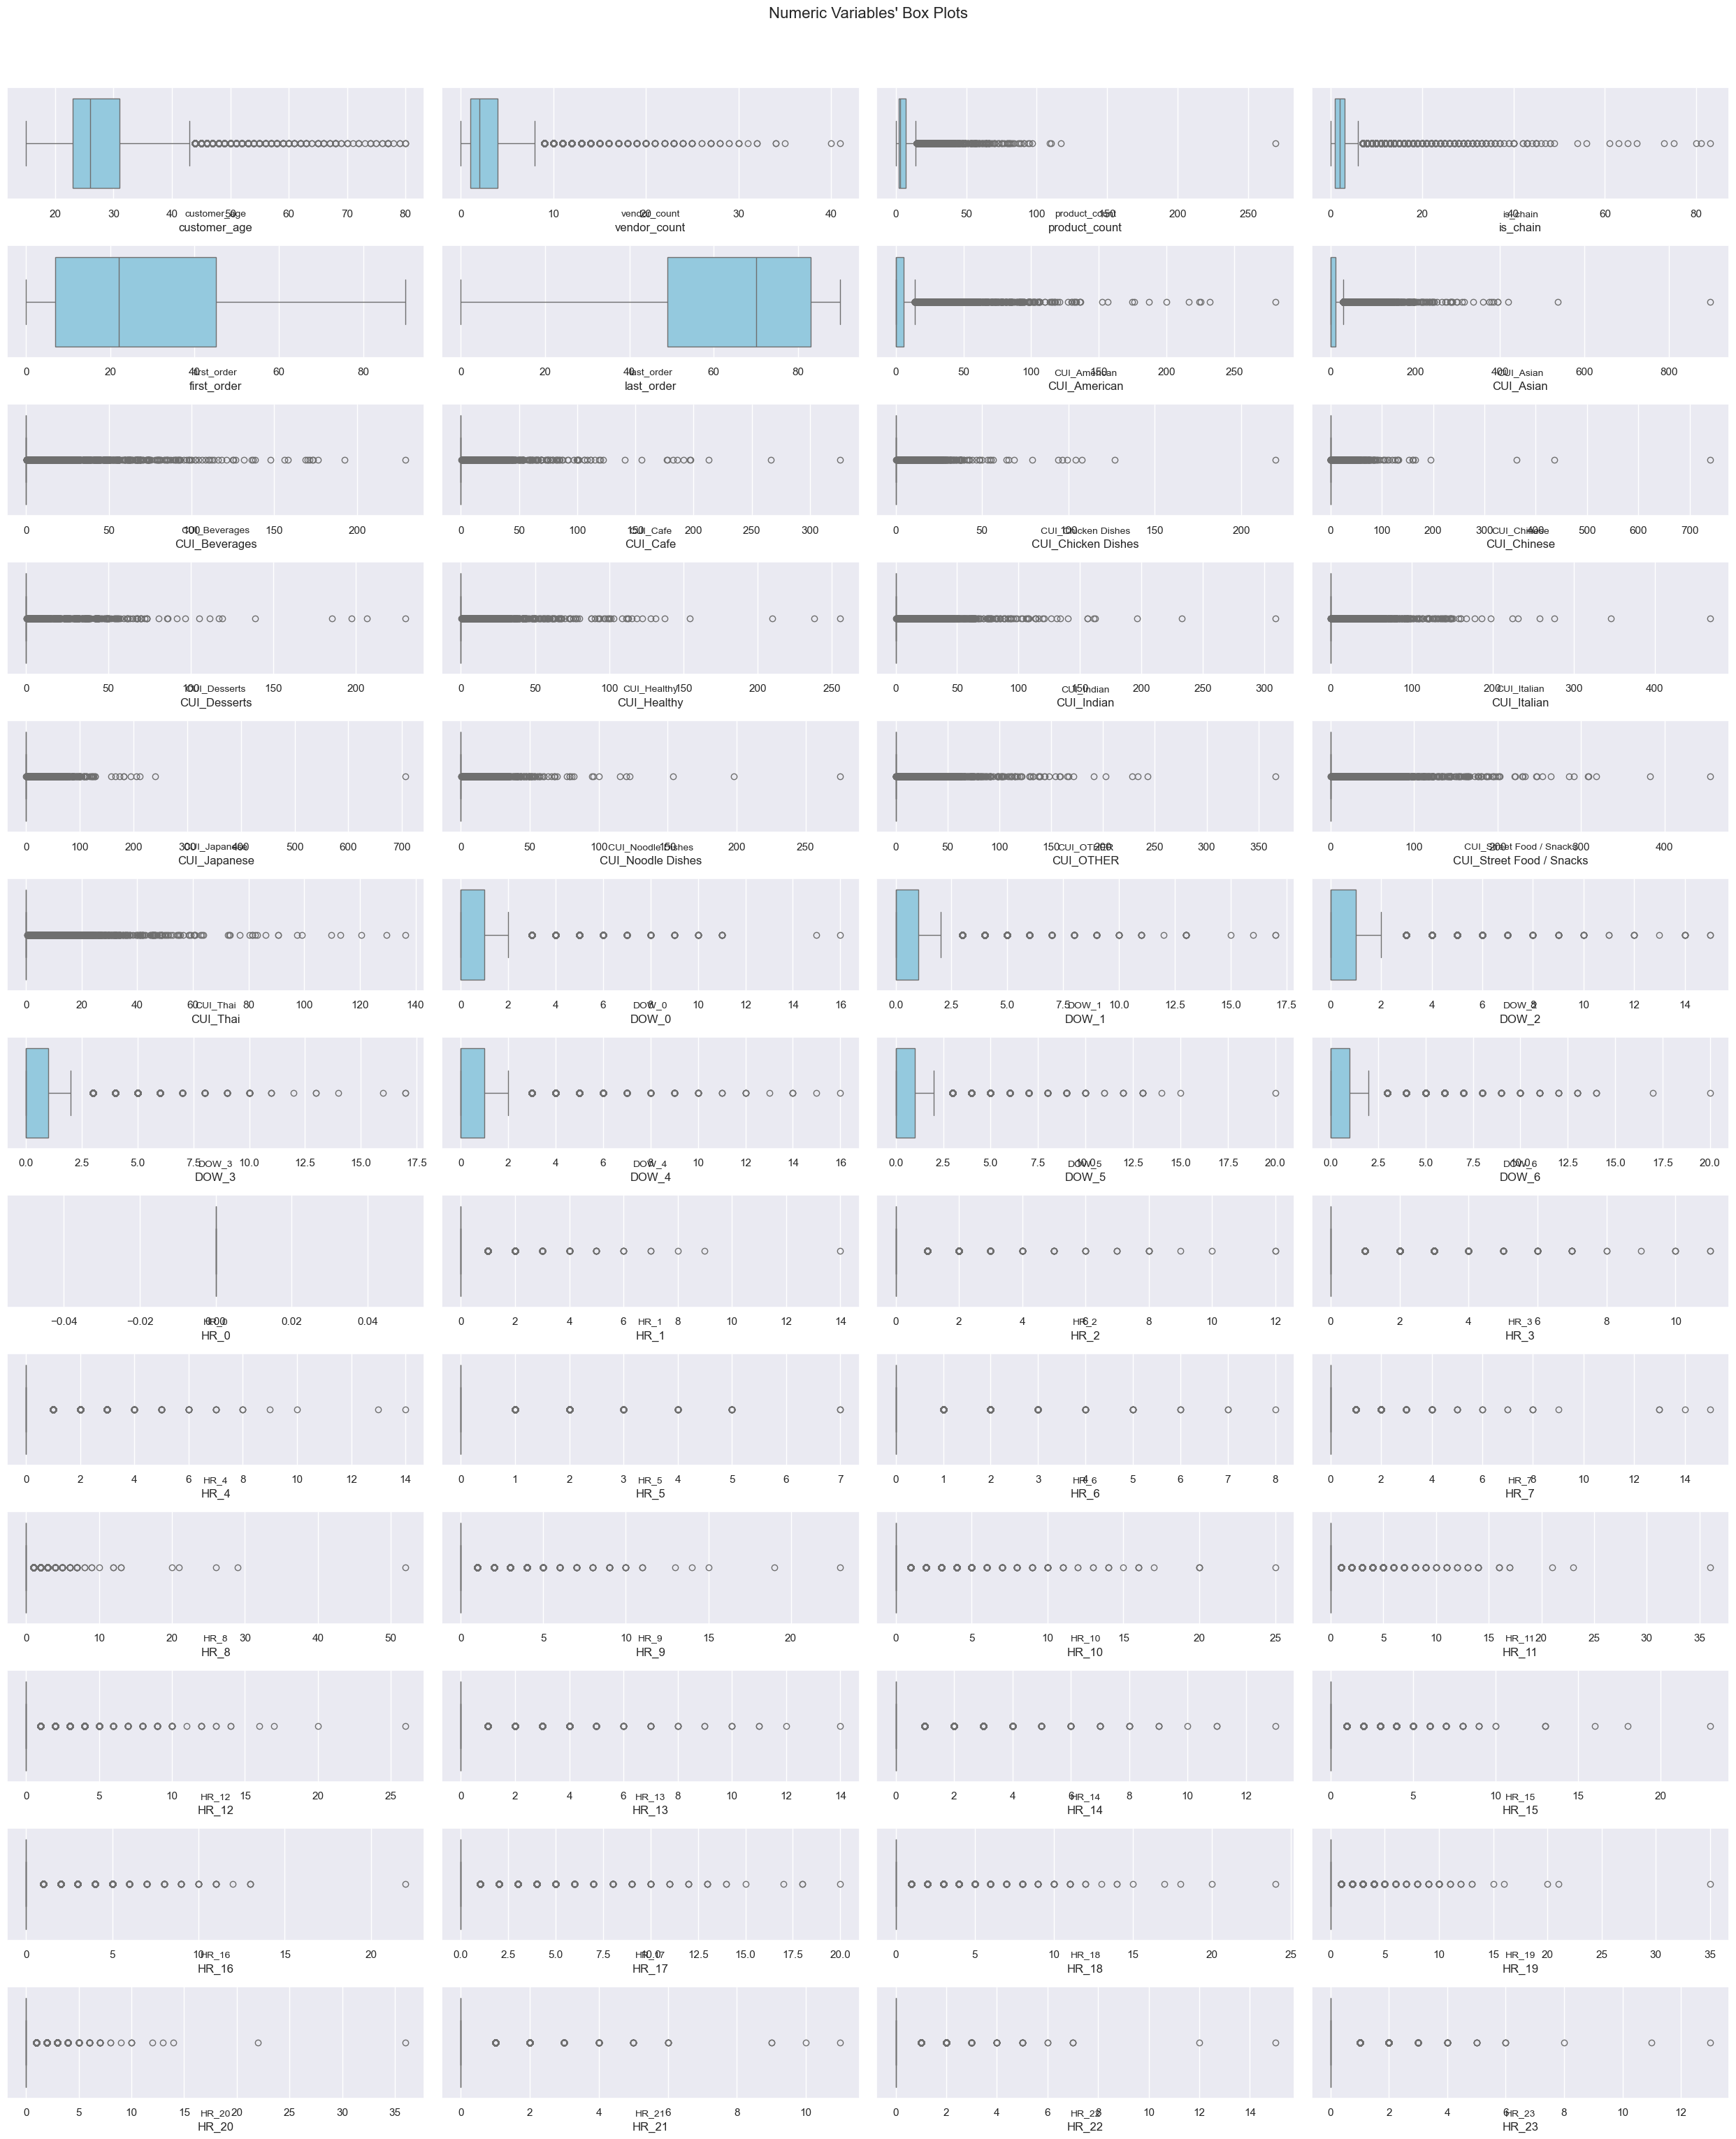

customer_age               Lower Limit:       11.0      Upper Limit:       43.0
vendor_count               Lower Limit:       -3.5      Upper Limit:        8.5
product_count              Lower Limit:       -5.5      Upper Limit:       14.5
is_chain                   Lower Limit:       -2.0      Upper Limit:        6.0
first_order                Lower Limit:      -50.0      Upper Limit:      102.0
last_order                 Lower Limit:       -2.0      Upper Limit:      134.0
CUI_American               Lower Limit:      -8.49      Upper Limit:      14.15
CUI_Asian                  Lower Limit:    -17.745      Upper Limit: 29.575000000000003
CUI_Beverages              Lower Limit:        0.0      Upper Limit:        0.0
CUI_Cafe                   Lower Limit:        0.0      Upper Limit:        0.0
CUI_Chicken Dishes         Lower Limit:        0.0      Upper Limit:        0.0
CUI_Chinese                Lower Limit:        0.0      Upper Limit:        0.0
CUI_Desserts               Lower

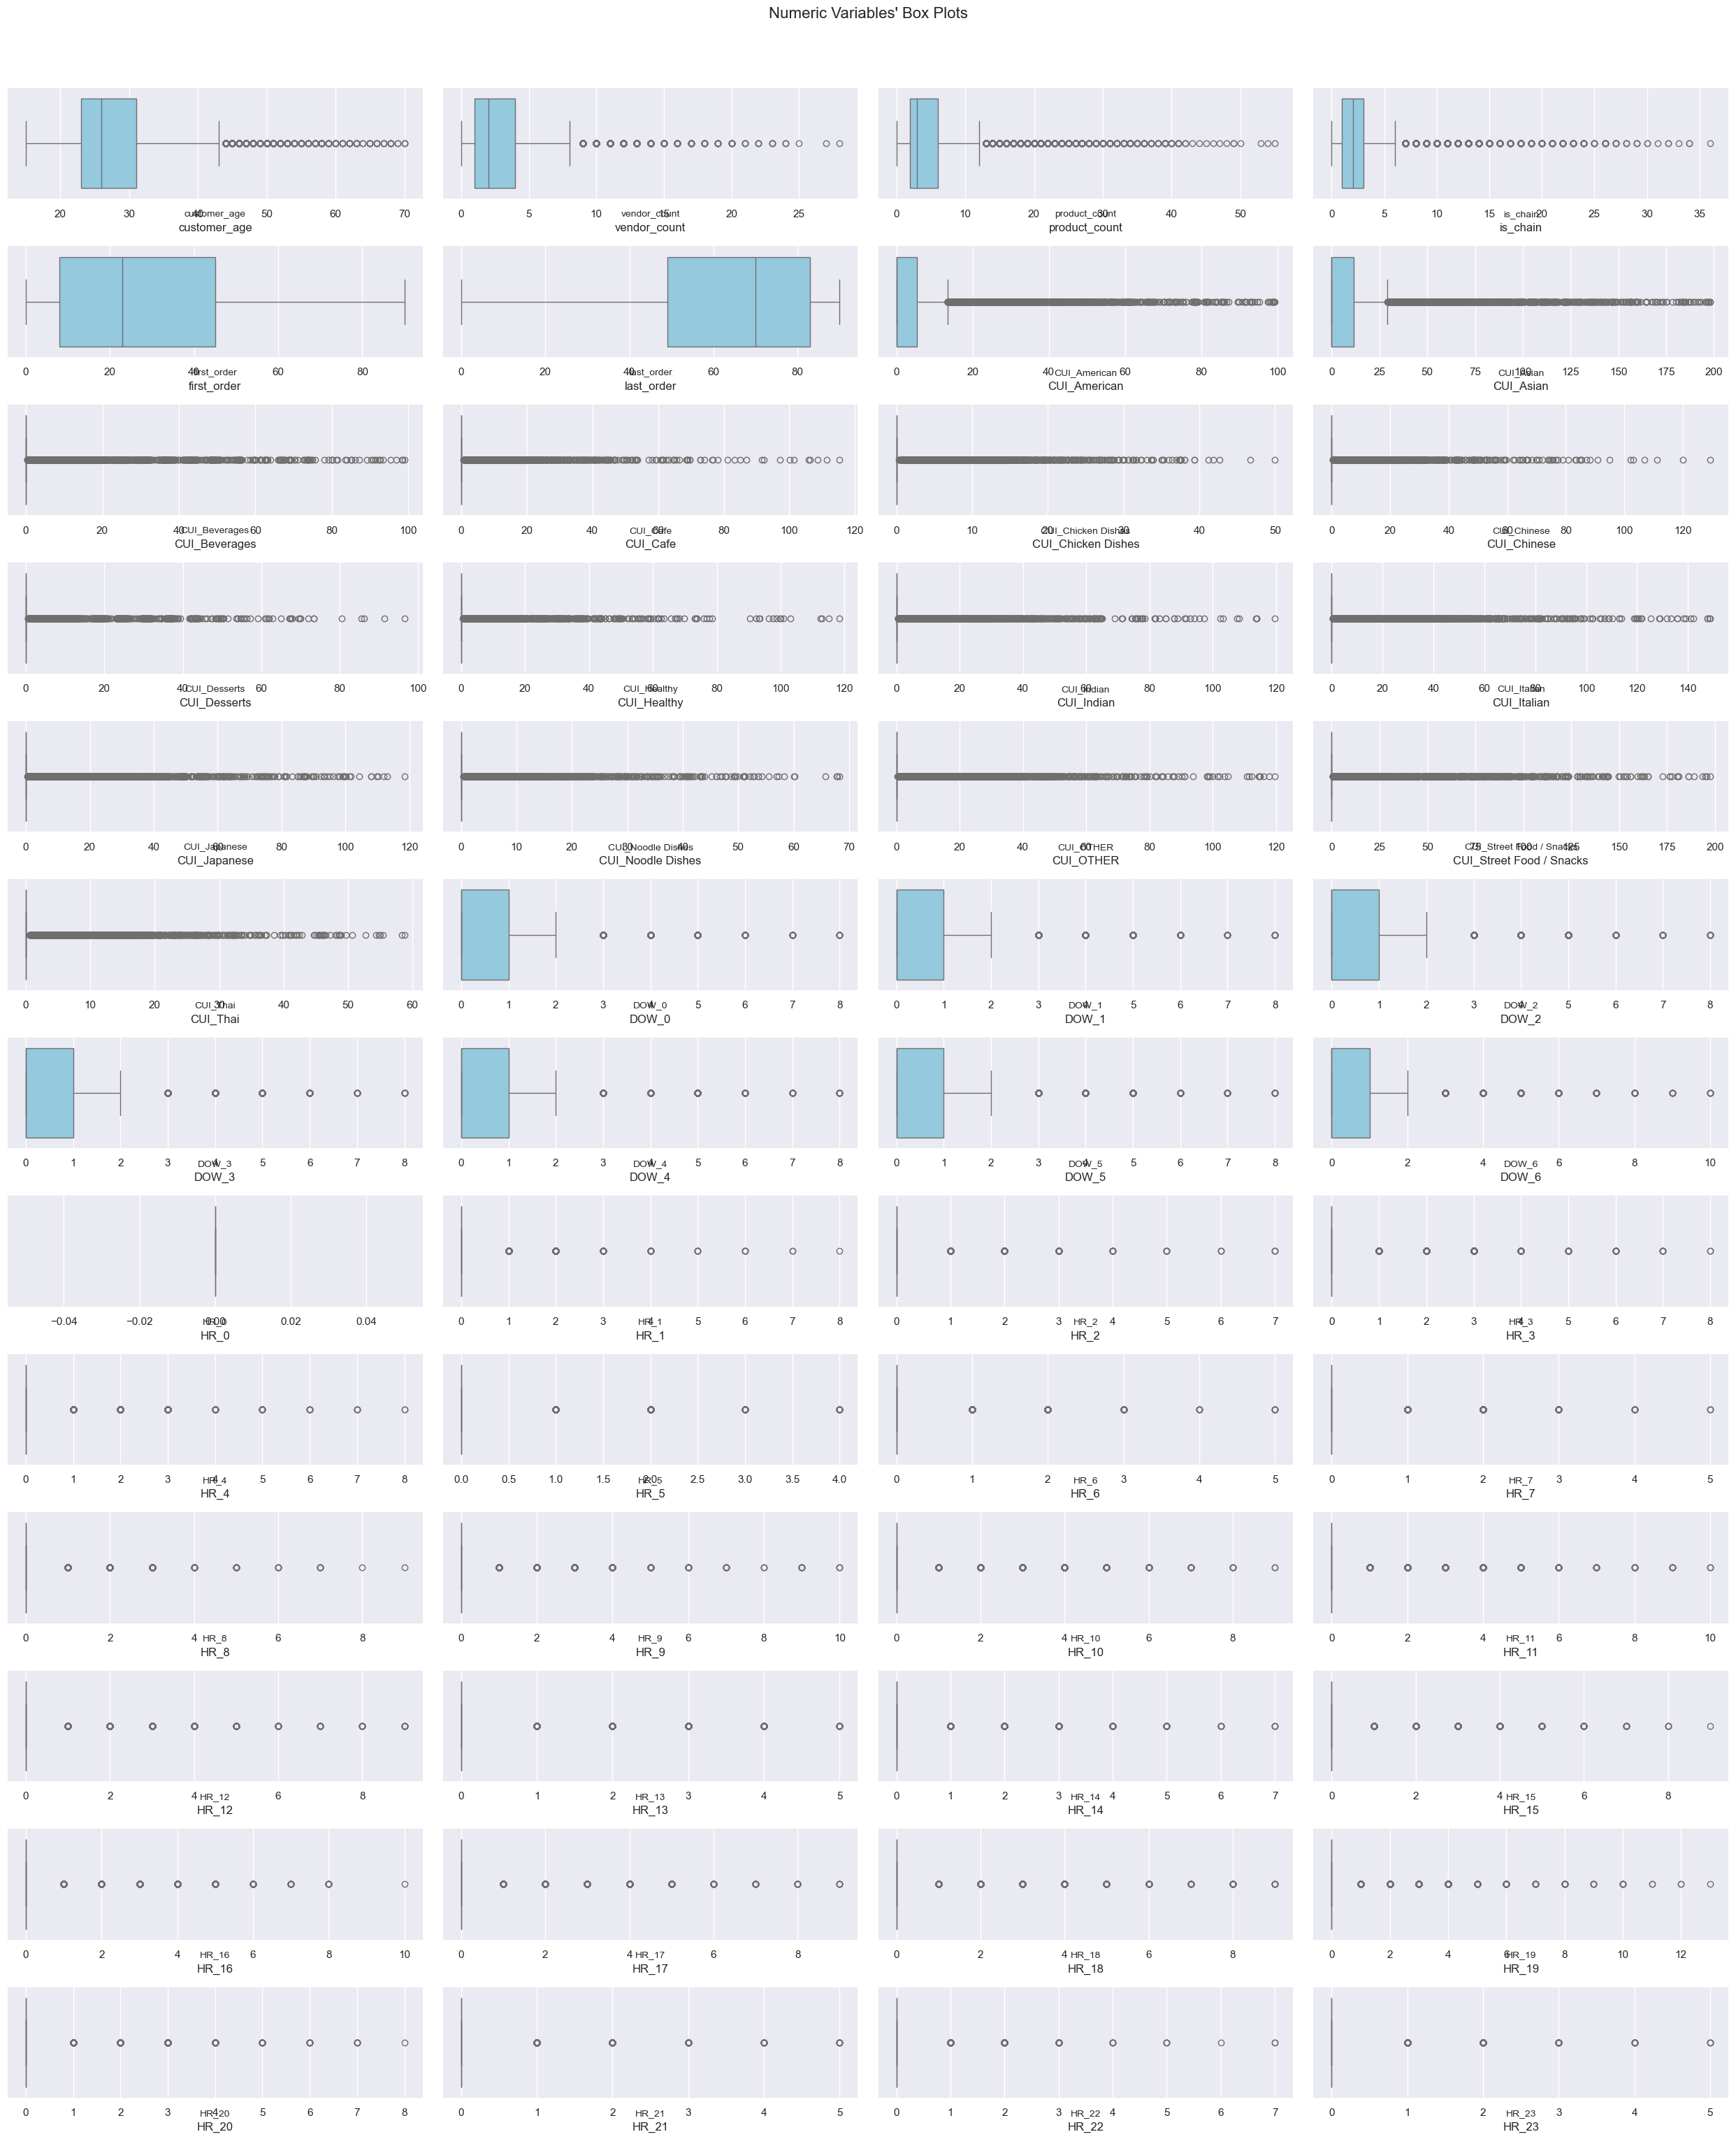

In [2]:
import pandas as pd 
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats
import warnings

from math import ceil
from sklearn.impute import KNNImputer

from Processing_Data import *

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

<a class="anchor" id="two-bullet"> 

## <span style="color:salmon"> 2. Import Dataset </span> 

<a href="#top">Top &#129033;</a>

In [3]:
df = pd.read_csv("../dataset/df_preprocessing.csv")

<a class="anchor" id="three-bullet"> 

## <span style="color:salmon">3. Create new Features </span> 

<a href="#top">Top &#129033;</a>

Creating new features can significantly enhance our analysis by providing additional insights and improving the performance of models

#### <span style="color:salmon"> 3.1 Customer Lifetime  </span>
Interval of customer activity, so we have an idea of ​​how many days the customer ordered.

In [4]:
df['lifetime_days'] = df['last_order'] - df['first_order']
df['lifetime_days'].dtype

dtype('int64')

#### <span style="color:salmon"> 3.2 Most frequent order day of the week  </span>
Indicates the days of the week on which the customer placed the most orders.

In [5]:
dows = ['DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'DOW_0'] # this order so it is from Monday to Sunday, not Sunday to Saturday]
def frequent_days(customer):
    max_value = customer[dows].max() # Day with the most orders
    result = []
    for col in dows: # Checks if there is more than one day with max_value
        if customer[col] == max_value:
            result.append(col)
    return result

df['preferred_order_days'] = df.apply(frequent_days, axis=1)
df['preferred_order_days'].dtype # obj 
all(isinstance(i, list) for i in df['preferred_order_days']) # confirm that all values ​​are lists

True

#### <span style="color:salmon"> 3.3 Most frequent part of the day  </span>
6h-12h --> Morning (Breakfast)  
12h-18h --> Afternoon (Lunch)  
18h-00h --> Evening (Dinner)  
00h-6h --> Night

In [6]:
def part_of_the_day(hour):
    if 6 <= hour < 12:
        return '06h-12h'
    elif 12 <= hour < 18:
        return '12h-18h'
    elif 18 <= hour < 24:
        return '18h-00h'
    else:  # 0 <= hour < 6
        return '00h-06h'

def frequent_hours(customer):
    part_counts = {
        '06h-12h': 0,
        '12h-18h': 0,
        '18h-00h': 0,
        '00h-06h': 0}
    for hour in range(24):
        num_orders = customer[f'HR_{hour}']
        if pd.isna(num_orders): # Ignore NaN
            continue
        part_of_day = part_of_the_day(hour)
        part_counts[part_of_day] += num_orders

    # Part of the day with the highest number of orders
    max_value = 0
    result = []
    for part, count in part_counts.items():
        if count > max_value:
            max_value = count  
            result = [part] 
        elif count == max_value:
            result.append(part) 
    return result
    
df['preferred_part_of_day'] = df.apply(frequent_hours, axis=1)
df['preferred_part_of_day'].dtype # obj 
all(isinstance(i, list) for i in df['preferred_part_of_day']) # confirm that all values ​​are lists

True

#### <span style="color:salmon"> 3.4 Total monetary units spend </span>
Sum all total expenses.

In [7]:
cuisine = df.filter(like='CUI_').columns.tolist() # Types of cuisine
df['total_expenses'] = df[cuisine].sum(axis=1)
df['total_expenses'].dtype

dtype('float64')

#### <span style="color:salmon"> 3.5 Average monetary units per product </span>
Show the average monetary of all products.

In [8]:
df['avg_per_product'] = pd.to_numeric(df['total_expenses'] / df['product_count'].replace(0, pd.NA), errors='coerce')
df['avg_per_product'].dtype

dtype('float64')

#### <span style="color:salmon"> 3.6 Average monetary units per order </span>
Show the average monetary per order. 

In [9]:
df['avg_per_order'] = pd.to_numeric(df['total_expenses'] / df[dows].sum(axis=1).replace(0, pd.NA), errors='coerce')
df['avg_per_order'].dtype

dtype('float64')

#### <span style="color:salmon"> 3.7 Average order size </span>
Help identifying users who make larger orders.

In [10]:
df['avg_order_size'] = pd.to_numeric(df['product_count'] / df[dows].sum(axis=1).replace(0, pd.NA), errors='coerce')
df['avg_order_size'].dtype

dtype('float64')

#### <span style="color:salmon"> 3.8 Culinary profile </span>
A proportion of ordered cuisines. A higher number indicates more diversity of types of cuisine you ordered.

In [11]:
total_cuisine = len(cuisine)

df['culinary_variety'] = round((df[cuisine].gt(0).sum(axis=1) / total_cuisine), 5)
df['culinary_variety'].dtype

dtype('float64')

#### <span style="color:salmon"> 3.9 Loyalty to chain restaurants </span>
Proportion of orders from restaurant chains. A high value indicates that you prefer to try different restaurant chains. A lower value is only more faithful to certain chains.

In [12]:
df['chain_preference'] = pd.to_numeric(df['is_chain'] / df[dows].sum(axis=1).replace(0, pd.NA), errors='coerce')
df['chain_preference'].dtype

dtype('float64')

#### <span style="color:salmon"> 3.10 Loyalty to venders </span>
Proportion of orders from specific restaurants. A high value indicates that you prefer to try different restaurants. A lower tend to be more loyal to specific restaurants.

In [13]:
df['loyalty_to_venders'] = pd.to_numeric(df['vendor_count'] / df[dows].sum(axis=1).replace(0, pd.NA), errors='coerce')
df['loyalty_to_venders'].dtype

dtype('float64')

To see all the new features that we added:

In [14]:
df.head(20)

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,lifetime_days,preferred_order_days,preferred_part_of_day,total_expenses,avg_per_product,avg_per_order,avg_order_size,culinary_variety,chain_preference,loyalty_to_venders
0,2360.0,18,2,5.0,1,0,1,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,28.88,0.0,0.00,0.0,0.0,0.00,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,"[DOW_6, DOW_0]",[18h-00h],28.88,5.776000,14.440000,2.500000,0.06667,0.500000,1.0
1,8670.0,17,2,2.0,2,0,1,DISCOUNT,DIGI,12.82,6.39,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,"[DOW_6, DOW_0]",[06h-12h],19.21,9.605000,9.605000,1.000000,0.13333,1.000000,1.0
2,4660.0,38,1,2.0,2,0,1,DISCOUNT,CASH,9.20,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,"[DOW_6, DOW_0]",[06h-12h],9.20,4.600000,4.600000,1.000000,0.06667,1.000000,0.5
3,4660.0,26,2,3.0,1,0,2,DELIVERY,DIGI,0.00,13.70,0.00,0.0,0.00,0.00,0.0,0.00,17.86,0.0,0.00,0.0,0.0,0.00,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,"[DOW_1, DOW_6]","[06h-12h, 12h-18h]",31.56,10.520000,15.780000,1.500000,0.13333,0.500000,1.0
4,4660.0,20,2,5.0,0,0,2,DELIVERY,DIGI,14.57,40.87,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,"[DOW_1, DOW_6]",[06h-12h],55.44,11.088000,27.720000,2.500000,0.13333,0.000000,1.0
5,8670.0,40,2,2.0,0,0,2,FREEBIE,DIGI,0.00,24.92,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,"[DOW_1, DOW_6]",[00h-06h],24.92,12.460000,12.460000,1.000000,0.06667,0.000000,1.0
6,2440.0,24,2,2.0,2,0,2,DELIVERY,CARD,5.88,0.00,1.53,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,2,"[DOW_1, DOW_6]","[06h-12h, 12h-18h]",7.41,3.705000,3.705000,1.000000,0.13333,1.000000,1.0
7,8670.0,27,2,3.0,2,0,2,DISCOUNT,DIGI,11.71,0.00,24.40,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,"[DOW_1, DOW_6]","[06h-12h, 12h-18h]",36.11,12.036667,18.055000,1.500000,0.13333,1.000000,1.0
8,2360.0,20,3,4.0,2,0,3,DISCOUNT,DIGI,2.75,0.00,0.00,0.0,0.00,0.00,0.0,4.39,0.00,0.0,0.00,0.0,7.3,0.00,0.0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,3,[DOW_6],[18h-00h],14.44,3.610000,4.813333,1.333333,0.20000,0.666667,1.0
9,8670.0,20,2,3.0,0,0,3,DELIVERY,CARD,0.00,32.48,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,"[DOW_2, DOW_6]",[00h-06h],32.48,10.826667,16.240000,1.500000,0.06667,0.000000,1.0


## <span style="color:yellow"> TABELA COM TODAS NEW FEATURES PARA METER RELATÓRIO (feito do iane já)</span> 

| New Feature  | how were created | description | why they were created | 
|--------------|------------------|-------------|-----------------------|
|Customer lifetime|last_order - first_order|time customers stayed with us|possible replacement for first- and last order|
|most frequent order days|day/days with most orders|shows prefered days for customer|possible replacement for all 7 DOW_ columns|
|most frequent part of day|divide hours in groups, count orders per group|part of days where most orders where made|possible replacement for all HR_ columns|
|total expenses|adding all values from CUI_columns|total amount of money spent per customer|important for evaluating customer impact|
|average per product|total expenses / product count|average money spent per product|shows what kind of products are ordere, more expensive or cheap ones|
|average per order|total expenses / total number of orders(sum of all DOW_ values)|average money spent per order|shows if customer buys more big orders or only small orders|
|culinary variety|number of different cuisines ordered from / number of all cuisines|value indicating amount of different cuisines ordered from|useful to differentiate customers in more "open minded" and more conversative|
|chain preference|is_chain / total orders|percentage of orders made at chain restaurants|useful to differentiate customers in thoose prefering chains or normal restaurants|
|loyality to vendors|vendor_count / total orders|value indicating loyality of customers in general to restaurants|distinguishes between customers who prefer order from restaurants they know and like and those who order from a lot of restaurants|


<a class="anchor" id="four-bullet"> 

## <span style="color:salmon">4. Processing new features </span> 

<a href="#top">Top &#129033;</a>

In [1]:
new_metric_features = ['lifetime_days', 'total_expenses', 'avg_per_product', 'avg_per_order', 'avg_order_size', 'culinary_variety', 'chain_preference', 'loyalty_to_venders']
new_non_metric_features = ['preferred_order_days', 'preferred_part_of_day']
new_features = new_metric_features + new_non_metric_features

To see the statistics of the new features:

In [16]:
df[new_features].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
lifetime_days,31326.0,NaN,NaN,NaN,34.585743,29.115557,0.0,2.0,33.0,61.0,90.0
total_expenses,31326.0,NaN,NaN,NaN,35.311061,36.560119,0.0,12.72,23.91,43.3975,440.32
avg_per_product,31188.0,NaN,NaN,NaN,7.587677,4.063717,0.37,4.136667,6.9525,10.15,24.39
avg_per_order,31188.0,NaN,NaN,NaN,10.292254,7.84593,0.37,5.0675,8.216667,12.894062,104.32
avg_order_size,31188.0,NaN,NaN,NaN,1.296173,0.416002,1.0,1.0,1.166667,1.5,6.0
culinary_variety,31326.0,NaN,NaN,NaN,0.148829,0.09499,0.0,0.06667,0.13333,0.2,0.8
chain_preference,31188.0,NaN,NaN,NaN,0.627151,0.388283,0.0,0.333333,0.724747,1.0,1.0
loyalty_to_venders,31188.0,NaN,NaN,NaN,0.844642,0.224045,0.052632,0.666667,1.0,1.0,1.0
preferred_order_days,31326,127,[DOW_6],3588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
preferred_part_of_day,31326,15,[12h-18h],11422,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Missing values:

In [56]:
missing_rows = df[new_features].isna().any(axis=1)

In [ ]:
# Percentage of missing values in each variable:
missing_percentage = ((df[new_features].isnull().sum() / len(df)) * 100).sort_values(ascending=False)
missing_percentage = missing_percentage[missing_percentage > 0]

print(f"Percentage of missing values:\n {missing_percentage}")

Visualize new numerical metric features:

In [ ]:
sns.set()

# Set up the figure and axes
rows, cols = 12, 5 
fig, axes = plt.subplots(rows, cols, figsize=(25, 30))  

# Plot each feature
for ax, feat in zip(axes.flatten(), new_metric_features):
    ax.hist(df[feat], bins=20, color='skyblue', edgecolor='black')  
    ax.set_title(feat, fontsize=10, y=-0.2)  

# Hide unused subplots:
for ax in axes.flatten()[len(new_metric_features):]:
    ax.set_visible(False)

# Set a global title and adjust layout
plt.suptitle("Numeric Variables' Histograms", fontsize=16, y=1.02)  
plt.tight_layout()
plt.show()

Visualize new non-numerical features:

In [ ]:
for column in new_non_metric_features:
    
    top_categories = df[column].value_counts().head(20)

    top_categories_sorted = top_categories.sort_values(ascending=True)

    data_filtered = df[df[column].isin(top_categories_sorted.index)]
    
   
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data_filtered, 
                  x=column, 
                  order=top_categories_sorted.index,  
                  palette='tab20b')
    
  
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title(f'Top 20 Categories in {column}')
    
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Treat missing values in new features:

In [ ]:
# Percentage of missing values in each variable:
missing_percentage = ((df[new_features].isnull().sum() / len(df)) * 100).sort_values(ascending=False)
missing_percentage = missing_percentage[missing_percentage > 0]

print(f"Percentage of missing values:\n {missing_percentage}")

Fill numerical missing values with median:

In [61]:
median_variables = ['avg_per_product', 'avg_per_order', 'avg_order_size', 'chain_preference', 'loyalty_to_venders']
for column in median_variables:
    median_value = df[column].median()
    df[column] = df[column].fillna(median_value)

Percentage of missing values in each variable:

In [ ]:
missing_percentage = ((df[new_features].isnull().sum() / len(df)) * 100).sort_values(ascending=False)
missing_percentage = missing_percentage[missing_percentage > 0]

print(f"Percentage of missing values:\n {missing_percentage}")

Store the index of rows with missing values in new_features and filter the DataFrame using the index:

In [ ]:
missing_rows_index = df[missing_rows].index

df_missing = df.loc[missing_rows_index]

Outliers:

In [ ]:
sns.set()


selected_features = new_metric_features

# Set up the figure and axes
rows, cols = 3, 3  #
fig, axes = plt.subplots(rows, cols, figsize=(15, 10)) 

# Flatten axes for iteration
axes = axes.flatten()

# Plot each feature as a box plot
for i, (ax, feat) in enumerate(zip(axes, selected_features)):
    sns.boxplot(data=df, x=feat, ax=ax, color='skyblue')  
    ax.set_title(feat, fontsize=10)  
    
# Hide any unused subplots:
for ax in axes[len(selected_features):]:
    ax.set_visible(False)

# Set a global title and adjust layout
plt.suptitle("Selected Numeric Variables' Box Plots", fontsize=16, y=1.02)  
plt.tight_layout()
plt.show()

Outlier Removal using automatic method:

In [ ]:
# Compute the interquartile range
q1 = df[new_metric_features].quantile(0.25)
q3 = df[new_metric_features].quantile(0.75)
iqr = q3 - q1

# Compute the limits:
lower_lim = q1 - (1.5 * iqr)
upper_lim = q3 + (1.5 * iqr)

for feature in new_metric_features:
    print(f"{feature:<25}  Lower Limit: {lower_lim[feature].round(5):>10}      Upper Limit: {upper_lim[feature].round(5):>10}")

Observations in which all features are outliers:

In [ ]:
outliers, obvious_outliers = identify_outliers(df, new_metric_features, lower_lim, upper_lim)

Conclusion: There is no observation in which all new features is an outlier. 

There is no outlier in 'lifetime_days', 'chain_preference'.

Check if there is any observation only with outliers, except on these features.

In [ ]:
new_metric_features_test = ['total_expenses', 'avg_per_product', 'avg_per_order', 'avg_order_size', 'culinary_variety', 'loyalty_to_venders']
outliers, obvious_outliers = identify_outliers(df, new_metric_features_test, lower_lim, upper_lim)

Conclusion: There is no observation with outliers in all new features.

Observations in which at least one new feature is an outlier:

In [68]:
new_filters_iqr = []                                            
for metric in new_metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    new_filters_iqr.append(df[metric].between(llim, ulim, inclusive='neither'))

new_filters_iqr_all = pd.concat(new_filters_iqr, axis=1).all(axis=1)

In [ ]:
new_filters_iqr_all

In [ ]:
# Number of observations with at least one features considered an outlier
new_features_percentage_data_kept = len(df[new_filters_iqr_all])/len(df)*100
new_features_percentage_outliers = round(100 - new_features_percentage_data_kept, 5)
print(f"Percentage of observations with at least one features considered an outlier: {new_features_percentage_outliers}%")
print(f"Percentage of data kept after removing outliers: {new_features_percentage_data_kept}%")

Outliers removal using manual method:

In [71]:
filters_manual_new_features = (
                (df["total_expenses"] <= 350) #
                &
                (df["avg_per_product"] <= 22) #??
                &
                (df["avg_per_order"] <= 70)  #50                          
                &
                (df["avg_order_size"] <= 4)                                  
                &
                (df["culinary_variety"] <= 0.7)
                &
                (df["loyalty_to_venders"] >= 0.1)
)                     

df_out_man_new_features = df[filters_manual_new_features]

In [ ]:
# Number of observations with at least one features considered an outlier
new_features_percentage_data_kept_manual = 100*(np.round(df_out_man_new_features.shape[0] / df.shape[0], decimals=5))
new_features_percentage_outliers_manual = round(100 - new_features_percentage_data_kept_manual, 5)
print(f"Percentage of observations with at least one features considered an outlier: {new_features_percentage_outliers_manual}%")
print(f"Percentage of data kept after removing outliers: {new_features_percentage_data_kept_manual}%")

Remove outliers combining automatic and manual methods:

In [73]:
df = df[(new_filters_iqr_all | filters_manual_new_features)]

## <span style="color:salmon">3.3 Visualize all features </span> 

In [ ]:
all_metric_features = [
    'customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 
    'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 
    'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 
    'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 
    'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 
    'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 
    'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 
    'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 
    'HR_20', 'HR_21', 'HR_22', 'HR_23', 'lifetime_days', 'total_expenses', 
    'avg_per_product', 'avg_per_order', 'avg_order_size', 'culinary_variety', 
    'chain_preference', 'loyalty_to_venders'
]

all_non_metric_features = [
    'customer_region', 'last_promo', 'payment_method', 
    'preferred_order_days', 'preferred_part_of_day'
]

len(all_metric_features)

#### <span style="color:salmon"> 3.3.1 Numerical Features </span>

In [ ]:
sns.set()

# Set up the figure and axes
rows, cols = 12, 5  
fig, axes = plt.subplots(rows, cols, figsize=(25, 30)) 

# Plot each feature
for ax, feat in zip(axes.flatten(), all_metric_features):
    ax.hist(df[feat], bins=20, color='skyblue', edgecolor='black')  
    ax.set_title(feat, fontsize=10, y=-0.2)  

# Hide unused subplots:
for ax in axes.flatten()[len(all_metric_features):]:
    ax.set_visible(False)

# Set a global title and adjust layout 
plt.suptitle("Numeric Variables' Histograms", fontsize=16, y=1.02)  
plt.tight_layout() 
plt.show()

#### <span style="color:salmon"> 3.3.2 Categorical Features </span>

In [ ]:
for column in all_non_metric_features:
    
    top_categories = df[column].value_counts().head(20)

    top_categories_sorted = top_categories.sort_values(ascending=True)

    data_filtered = df[df[column].isin(top_categories_sorted.index)]
    
   
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data_filtered, 
                  x=column, 
                  order=top_categories_sorted.index,  
                  palette='tab20b')
    
  
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title(f'Top 20 Categories in {column}')
    
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [77]:
# Store in df_new_features the DataFrame of our dataset df
df_new_features = pd.DataFrame(df)

# Save to CSV
df_new_features.to_csv('../dataset/df_new_features.csv', index=False)